In [ ]:
import numpy as np
import pandas as pd
import osmnx as ox
import networkx as nx
from geopandas import gpd
from osmnx import graph_to_gdfs, graph_from_gdfs
from shapely.geometry import Point, LineString, shape, MultiPoint, box, Polygon, MultiLineString, mapping
from shapely.ops import linemerge
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [ ]:
# get a street network and plot it with all edge intersections
address = '2000 Mountain Road NW, Albuquerque, NM 87104'
G = ox.graph_from_address(address, network_type='drive', dist=1000)

In [ ]:
fig, ax = ox.plot_graph(G, figsize=(12, 12), node_color='orange', node_size=30,
node_zorder=2, node_edgecolor='k')

In [ ]:
# clean up the intersections and extract their xy coords
G_Projected = ox.project_graph(G)
points = ox.consolidate_intersections(G_Projected, tolerance=15, dead_ends=False, rebuild_graph=False)
points

G_consolidated = ox.consolidate_intersections(G_Projected, tolerance=15, dead_ends=False, rebuild_graph=True)
fig, ax = ox.plot_graph(G_consolidated, figsize=(12, 12), node_color='orange', node_size=30,
node_zorder=2, node_edgecolor='k')

In [ ]:
nodes, edges = ox.graph_to_gdfs(G_consolidated, fill_edge_geometry=False)
nodes


2022-04-12 01:09:57 Configured OSMnx 1.1.2
2022-04-12 01:09:57 HTTP response caching is on
2022-04-12 01:09:58 Retrieved response from cache file "cache/fd5084bd85639930b6c50425cb9a8bcf75428f10.json"
2022-04-12 01:09:58 Geocoded "2000 Mountain Road NW, Albuquerque, NM 87104" to (35.09820879531227, -106.66752125258822)
2022-04-12 01:09:58 Created bbox 1000 m from (35.09820879531227, -106.66752125258822): 35.10720199866719,35.08921559195734,-106.65652936983486,-106.67851313534157
2022-04-12 01:09:58 Projected GeoDataFrame to +proj=utm +zone=13 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-04-12 01:09:58 Projected GeoDataFrame to epsg:4326
2022-04-12 01:09:58 Projected GeoDataFrame to +proj=utm +zone=13 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-04-12 01:09:58 Projected GeoDataFrame to epsg:4326
2022-04-12 01:09:58 Requesting data within polygon from API in 1 request(s)
2022-04-12 01:09:58 Retrieved response from cache file "cache/42d2fc5d0fec4b5a89b65dfe0a8f4

/opt/miniconda3/envs/ox/lib/python3.10/site-packages/osmnx/simplification.py:499: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  subcluster_centroid = node_points.loc[wcc].unary_union.centroid
/opt/miniconda3/envs/ox/lib/python3.10/site-packages/osmnx/simplification.py:500: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  gdf.loc[wcc, "x"] = subcluster_centroid.x
/opt/miniconda3/envs/ox/lib/python3.10/site-packages/osmnx/simplification.py:501: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  gdf.loc[wcc, "y"] = subcluster_centroid.y
/opt/miniconda3/envs/ox/lib/python3.10/site-packages/osmnx/simplification.py:503: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  gdf.loc[wcc, "cluster"] = f"{cluster_label}-{suffix}"
/opt/minic

2022-04-12 01:09:59 Counted undirected street segments incident on each node
2022-04-12 01:09:59 Created edges GeoDataFrame from graph
2022-04-12 01:09:59 Created nodes GeoDataFrame from graph
2022-04-12 01:09:59 Created edges GeoDataFrame from graph
2022-04-12 01:09:59 Begin plotting the graph...
2022-04-12 01:09:59 Created edges GeoDataFrame from graph
2022-04-12 01:09:59 Created nodes GeoDataFrame from graph


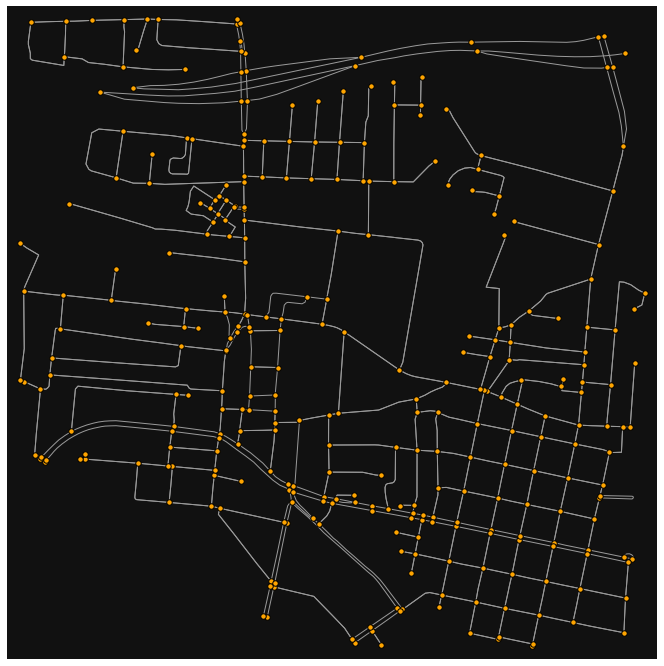

2022-04-12 01:09:59 Finished plotting the graph
2022-04-12 01:09:59 Begin plotting the graph...
2022-04-12 01:09:59 Created edges GeoDataFrame from graph
2022-04-12 01:09:59 Created nodes GeoDataFrame from graph


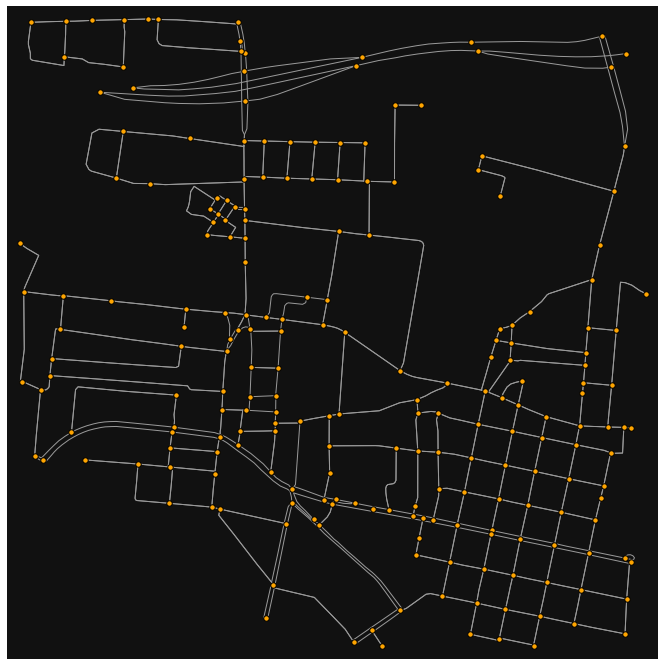

2022-04-12 01:09:59 Finished plotting the graph


{140742396: {'347273.8562092318, 3885959.503960234', 'Coronado Freeway', None},
 '[1791569794, 140742414]': {'347730.0939076872, 3885931.9581950684',
  None,
  'Rio Grande Boulevard Northwest'},
 140742423: {'348081.37623779837, 3886043.5192638594', 'Coronado Freeway'},
 '[140807890, 1791569904]': {'347727.60324218246, 3886025.8930919133',
  None,
  'Rio Grande Boulevard Northwest'},
 140807436: {'348466.2966925085, 3886089.8620414906',
  'Coronado Freeway',
  None},
 140754915: {'11th Street Northwest',
  '348997.4639846175, 3885322.981507687',
  'Kinley Avenue Northwest',
  None},
 140861872: {'11th Street Northwest',
  '348903.5586711279, 3885206.8426088765',
  'Arios Avenue Northwest',
  'Kinley Avenue Northwest'},
 '[140814356, 1838344660]': {'12th Street Northwest',
  '348886.1854080349, 3886038.717403669',
  None},
 140816418: {'348935.0330470626, 3886081.849557484'},
 140807452: {'348446.02789693954, 3886117.637124404', 'Coronado Freeway'},
 140807881: {'348099.9581267034, 3886

In [66]:
## this should be something to actually pull out the street names from the cleaned intersections
## got from this issue https://github.com/gboeing/osmnx/issues/199
## modified to work with the updated version of osmnx 1.1.2

import networkx as nx
import osmnx as ox
import geopandas as gpd
ox.config(log_console=True, use_cache=True)

address = '2000 Mountain Road NW, Albuquerque, NM 87104'
G = ox.graph_from_address(address, network_type='drive', dist=1000)

G = ox.project_graph(G)

## The consolidated_graph does not maintain the original edge node data after consolidation
consolidated_graph = ox.consolidate_intersections(G, tolerance=10, dead_ends=False)

int_nodes, edges = ox.graph_to_gdfs(consolidated_graph, fill_edge_geometry=False)

ox.plot_graph(G, figsize=(12, 12), node_color='orange', node_size=30,
node_zorder=2, node_edgecolor='k')

ox.plot_graph(consolidated_graph, figsize=(12, 12), node_color='orange', node_size=30,
node_zorder=2, node_edgecolor='k')


connections = {}

#THIS WORKS, JUST NEED TO CONVERT EASTING AND NORTHING BACK TO WGS84
for n, geopt in zip(int_nodes["osmid_original"], int_nodes["geometry"]):
    connections[n] = set([])
    easting = geopt.coords[0][0]
    northing = geopt.coords[0][1]
    connections[n].add(f"{easting}, {northing}")
    if isinstance(n, str):
        newN = n[1:len(n) - 1].split(",")
        for nn in newN:
            nn = int(nn)
            for nbr in nx.neighbors(G, nn):
                for d in G.get_edge_data(nn, nbr).values():
                    if 'name' in d:
                        if type(d['name']) == str:
                            connections[n].add(d['name'])
                        elif type(d['name']) == list:
                            for name in d['name']:
                                connections[n].add(name)
                        else:
                            connections[n].add(None)
                    else:
                        connections[n].add(None)

    else:
        for nbr in nx.neighbors(G, n):
            for d in G.get_edge_data(n, nbr).values():
                if 'name' in d:
                    if type(d['name']) == str:
                        connections[n].add(d['name'])
                    elif type(d['name']) == list:
                        for name in d['name']:
                            connections[n].add(name)
                    else:
                        connections[n].add(None)
                else:
                    connections[n].add(None)

connections

##TODO: Get rid of any of the values that aren't valid intersections of at least 2 crossstreets, and throw out any Nones
##TODO: Convert the easting and northings back to WGS84, so we can use them later
##TODO: Format the data so that Pelias can ingest it
##TODO: Experiment with best way to give to Pelias - cross street formats, v place name


2022-04-12 22:50:14 Configured OSMnx 1.1.2
2022-04-12 22:50:14 HTTP response caching is on
2022-04-12 22:50:14 Retrieved response from cache file "cache/fd5084bd85639930b6c50425cb9a8bcf75428f10.json"
2022-04-12 22:50:14 Geocoded "2000 Mountain Road NW, Albuquerque, NM 87104" to (35.09820879531227, -106.66752125258822)
2022-04-12 22:50:14 Created bbox 1000 m from (35.09820879531227, -106.66752125258822): 35.10720199866719,35.08921559195734,-106.65652936983486,-106.67851313534157
2022-04-12 22:50:14 Projected GeoDataFrame to +proj=utm +zone=13 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-04-12 22:50:14 Projected GeoDataFrame to epsg:4326
2022-04-12 22:50:14 Projected GeoDataFrame to +proj=utm +zone=13 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-04-12 22:50:14 Projected GeoDataFrame to epsg:4326
2022-04-12 22:50:14 Requesting data within polygon from API in 1 request(s)
2022-04-12 22:50:14 Retrieved response from cache file "cache/42d2fc5d0fec4b5a89b65dfe0a8f4

/opt/miniconda3/envs/ox/lib/python3.10/site-packages/osmnx/simplification.py:499: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  subcluster_centroid = node_points.loc[wcc].unary_union.centroid
/opt/miniconda3/envs/ox/lib/python3.10/site-packages/osmnx/simplification.py:500: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  gdf.loc[wcc, "x"] = subcluster_centroid.x
/opt/miniconda3/envs/ox/lib/python3.10/site-packages/osmnx/simplification.py:501: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  gdf.loc[wcc, "y"] = subcluster_centroid.y
/opt/miniconda3/envs/ox/lib/python3.10/site-packages/osmnx/simplification.py:503: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  gdf.loc[wcc, "cluster"] = f"{cluster_label}-{suffix}"
/opt/minic

2022-04-12 22:50:15 Counted undirected street segments incident on each node
2022-04-12 22:50:15 Created edges GeoDataFrame from graph
2022-04-12 22:50:15 Created nodes GeoDataFrame from graph
2022-04-12 22:50:15 Created edges GeoDataFrame from graph
2022-04-12 22:50:15 Begin plotting the graph...
2022-04-12 22:50:16 Created edges GeoDataFrame from graph
2022-04-12 22:50:16 Created nodes GeoDataFrame from graph


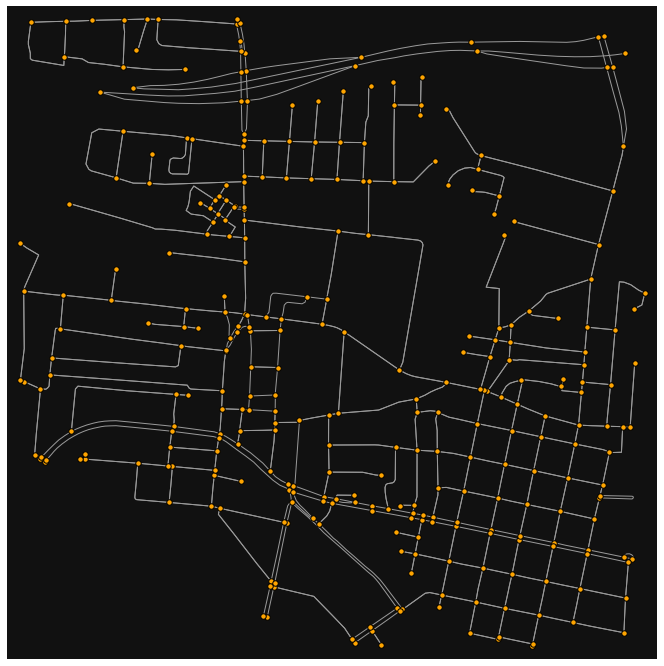

2022-04-12 22:50:16 Finished plotting the graph
2022-04-12 22:50:16 Begin plotting the graph...
2022-04-12 22:50:16 Created edges GeoDataFrame from graph
2022-04-12 22:50:16 Created nodes GeoDataFrame from graph


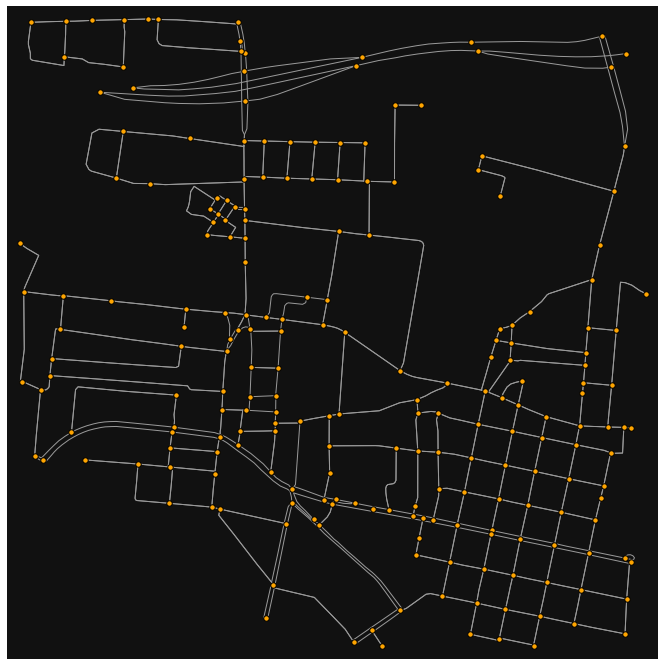

2022-04-12 22:50:16 Finished plotting the graph


{140742396: {'easting': 347273.8562092318,
  'northing': 3885959.503960234,
  'intersecting_street_names': [None, 'Coronado Freeway']},
 '1791569794, 140742414': {'easting': 347730.0939076872,
  'northing': 3885931.9581950684,
  'intersecting_street_names': [None,
   'Rio Grande Boulevard Northwest',
   'Rio Grande Boulevard Northwest',
   None]},
 140742423: {'easting': 348081.37623779837,
  'northing': 3886043.5192638594,
  'intersecting_street_names': ['Coronado Freeway']},
 '140807890, 1791569904': {'easting': 347727.60324218246,
  'northing': 3886025.8930919133,
  'intersecting_street_names': [None,
   'Rio Grande Boulevard Northwest',
   'Rio Grande Boulevard Northwest',
   None]},
 140807436: {'easting': 348466.2966925085,
  'northing': 3886089.8620414906,
  'intersecting_street_names': [None, 'Coronado Freeway']},
 140754915: {'easting': 348997.4639846175,
  'northing': 3885322.981507687,
  'intersecting_street_names': [None,
   '11th Street Northwest',
   'Kinley Avenue Northw

In [68]:
## this should be something to actually pull out the street names from the cleaned intersections
## got from this issue https://github.com/gboeing/osmnx/issues/199
## modified to work with the updated version of osmnx 1.1.2

import networkx as nx
import osmnx as ox
import geopandas as gpd
ox.config(log_console=True, use_cache=True)

address = '2000 Mountain Road NW, Albuquerque, NM 87104'
G = ox.graph_from_address(address, network_type='drive', dist=1000)

G = ox.project_graph(G)

## The consolidated_graph does not maintain the original edge node data after consolidation
consolidated_graph = ox.consolidate_intersections(G, tolerance=10, dead_ends=False)

int_nodes, edges = ox.graph_to_gdfs(consolidated_graph, fill_edge_geometry=False)

ox.plot_graph(G, figsize=(12, 12), node_color='orange', node_size=30,
node_zorder=2, node_edgecolor='k')

ox.plot_graph(consolidated_graph, figsize=(12, 12), node_color='orange', node_size=30,
node_zorder=2, node_edgecolor='k')


connections = {}

#THIS WORKS, JUST NEED TO CONVERT EASTING AND NORTHING BACK TO WGS84
#IT COULD PROBABLY ALSO USE SOME CLEANING UP TO BE MORE PYTHONIC...AND JUST BETTER ALGO IMPLEMENTATION
for n, geopt in zip(int_nodes["osmid_original"], int_nodes["geometry"]):
    if isinstance(n, str):
        n = n[1:len(n) - 1]
    connections[n] = {}
    easting = geopt.coords[0][0]
    northing = geopt.coords[0][1]
    connections[n]["easting"] = easting
    connections[n]["northing"] = northing
    connections[n]["intersecting_street_names"] = []
    if isinstance(n, str):
        newN = n.split(",")
        for nn in newN:
            nn = int(nn)
            for nbr in nx.neighbors(G, nn):
                for d in G.get_edge_data(nn, nbr).values():
                    if 'name' in d:
                        if type(d['name']) == str:
                            connections[n]["intersecting_street_names"].append(d['name'])
                        elif type(d['name']) == list:
                            for name in d['name']:
                                connections[n]["intersecting_street_names"].append(name)
                        else:
                            connections[n]["intersecting_street_names"].append(None)
                    else:
                        connections[n]["intersecting_street_names"].append(None)

    else:
        for nbr in nx.neighbors(G, n):
            for d in G.get_edge_data(n, nbr).values():
                if 'name' in d:
                    if type(d['name']) == str:
                        connections[n]["intersecting_street_names"].append(d['name'])
                    elif type(d['name']) == list:
                        for name in d['name']:
                            connections[n]["intersecting_street_names"].append(name)
                    else:
                        connections[n]["intersecting_street_names"].append(None)
                else:
                    connections[n]["intersecting_street_names"].append(None)

connections

##TODO: Get rid of any of the values that aren't valid intersections of at least 2 crossstreets, and throw out any Nones
##TODO: Convert the easting and northings back to WGS84, so we can use them later
##TODO: Format the data so that Pelias can ingest it
##TODO: Experiment with best way to give to Pelias - cross street formats, v place name


In [ ]:
## REMOVE THE NONES & RESULTING INTERSCTIONS OF LESS THAN TWO
connections_with_none_and_less_than_two_removed = {}
for connection in connections:
    connection["intersecting_street_names"] = [i for i in connection["intersecting_street_names"] if not isinstance(i, None)]
#     if len(connection["intersecting_street_names"]) > 1:
#         connections_with_none_and_less_than_two_removed[]
    
    

In [ ]:
foo = {
    "a": "anick",
    "b": "bnick",
    "c": "cnick"
}
foo